In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from scipy.stats import uniform, norm, gamma, expon, poisson

In [2]:
datas = []
lines = 30
bins = 20
x = np.zeros((lines, bins))
y = np.zeros((lines, bins))
max_y = 0
min_x = 1000
max_x = 0
for i in range(lines):
    dist = norm.rvs(size=2000, loc = i*1.5, scale=2)
    yy, xx = np.histogram(dist, bins=bins)
    x[i] = xx[1:]
    y[i] = yy
    max_y = max(max_y, y[i].max())
    max_x = max(max_x, x[i].max())
    min_x = min(min_x, x[i].min())

min_x_arr = np.full((lines, 1), min_x)
max_x_arr = np.full((lines, 1), max_x)
zeros = np.zeros((lines, 1))
y /= y.mean()
x = np.hstack([min_x_arr, x, max_x_arr])
y = np.hstack([zeros, y, zeros])

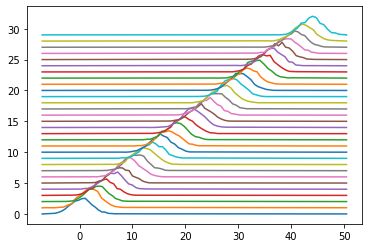

In [3]:
plt.figure()
for i in range(lines):
    plt.plot(x[i], y[i] + i)

In [18]:
import pandas as pd

In [165]:
earthquakes = pd.read_csv("SSNMX_catalogo_20180101_20181231.csv", skiprows=4, parse_dates=["Fecha"])
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 10 columns):
Fecha                         30200 non-null object
Hora                          30193 non-null object
Magnitud                      30193 non-null float64
Latitud                       30193 non-null float64
Longitud                      30193 non-null float64
Profundidad                   30193 non-null float64
Referencia de localizacion    30193 non-null object
Fecha UTC                     30193 non-null object
Hora UTC                      30193 non-null object
Estatus                       30193 non-null object
dtypes: float64(4), object(6)
memory usage: 2.3+ MB


In [166]:
earthquakes.describe()

,Magnitud,Latitud,Longitud,Profundidad
count,30193.00000,30193.000000,30193.000000,30193.000000
mean,3.54668,16.810831,-97.668903,29.869294
std,0.38386,2.459683,3.810678,32.053851
min,1.20000,13.129800,-116.709000,1.000000
25%,3.40000,15.984000,-98.274300,10.000000
50%,3.60000,16.284300,-97.853000,16.100000
75%,3.80000,16.688000,-95.005200,37.100000
max,7.20000,32.823200,-90.326300,242.800000


In [151]:
# https://boundingbox.klokantech.com/
# [[xmin, xmax], [ymin, ymax]]
# westlimit=; southlimit=15.7749; eastlimit=-97.836; northlimit=19.1138
dublin_core = "westlimit=-105.68; southlimit=13.79; eastlimit=-92.04; northlimit=20.14"
w, s, e, n = [float(part.split("=")[1][:-1]) for part in dublin_core.split(";")]
coordinates_range = [[w, e], [s, n]]
values, xedges, yedges = np.histogram2d(earthquakes["Longitud"].values, 
                                        earthquakes["Latitud"].values,
                                        range=coordinates_range,
                                        bins=[600, 100])


def in_between(data):
    value = np.zeros(len(data)-1)
    for i in range(len(data)-1):
        value[i] = (data[i] + data[i+1]) / 2
    return value

xcenters = in_between(xedges)
ycenters = in_between(yedges)
xv, yv = np.meshgrid(xcenters, ycenters, sparse=False, indexing='ij')
print(xv.shape, len(ycenters))

(600, 100) 100


In [152]:
map_df = gpd.read_file("Mexico_Estados/Mexico_Estados.shp")
map_df.head()

,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


(13.7, 20.1)

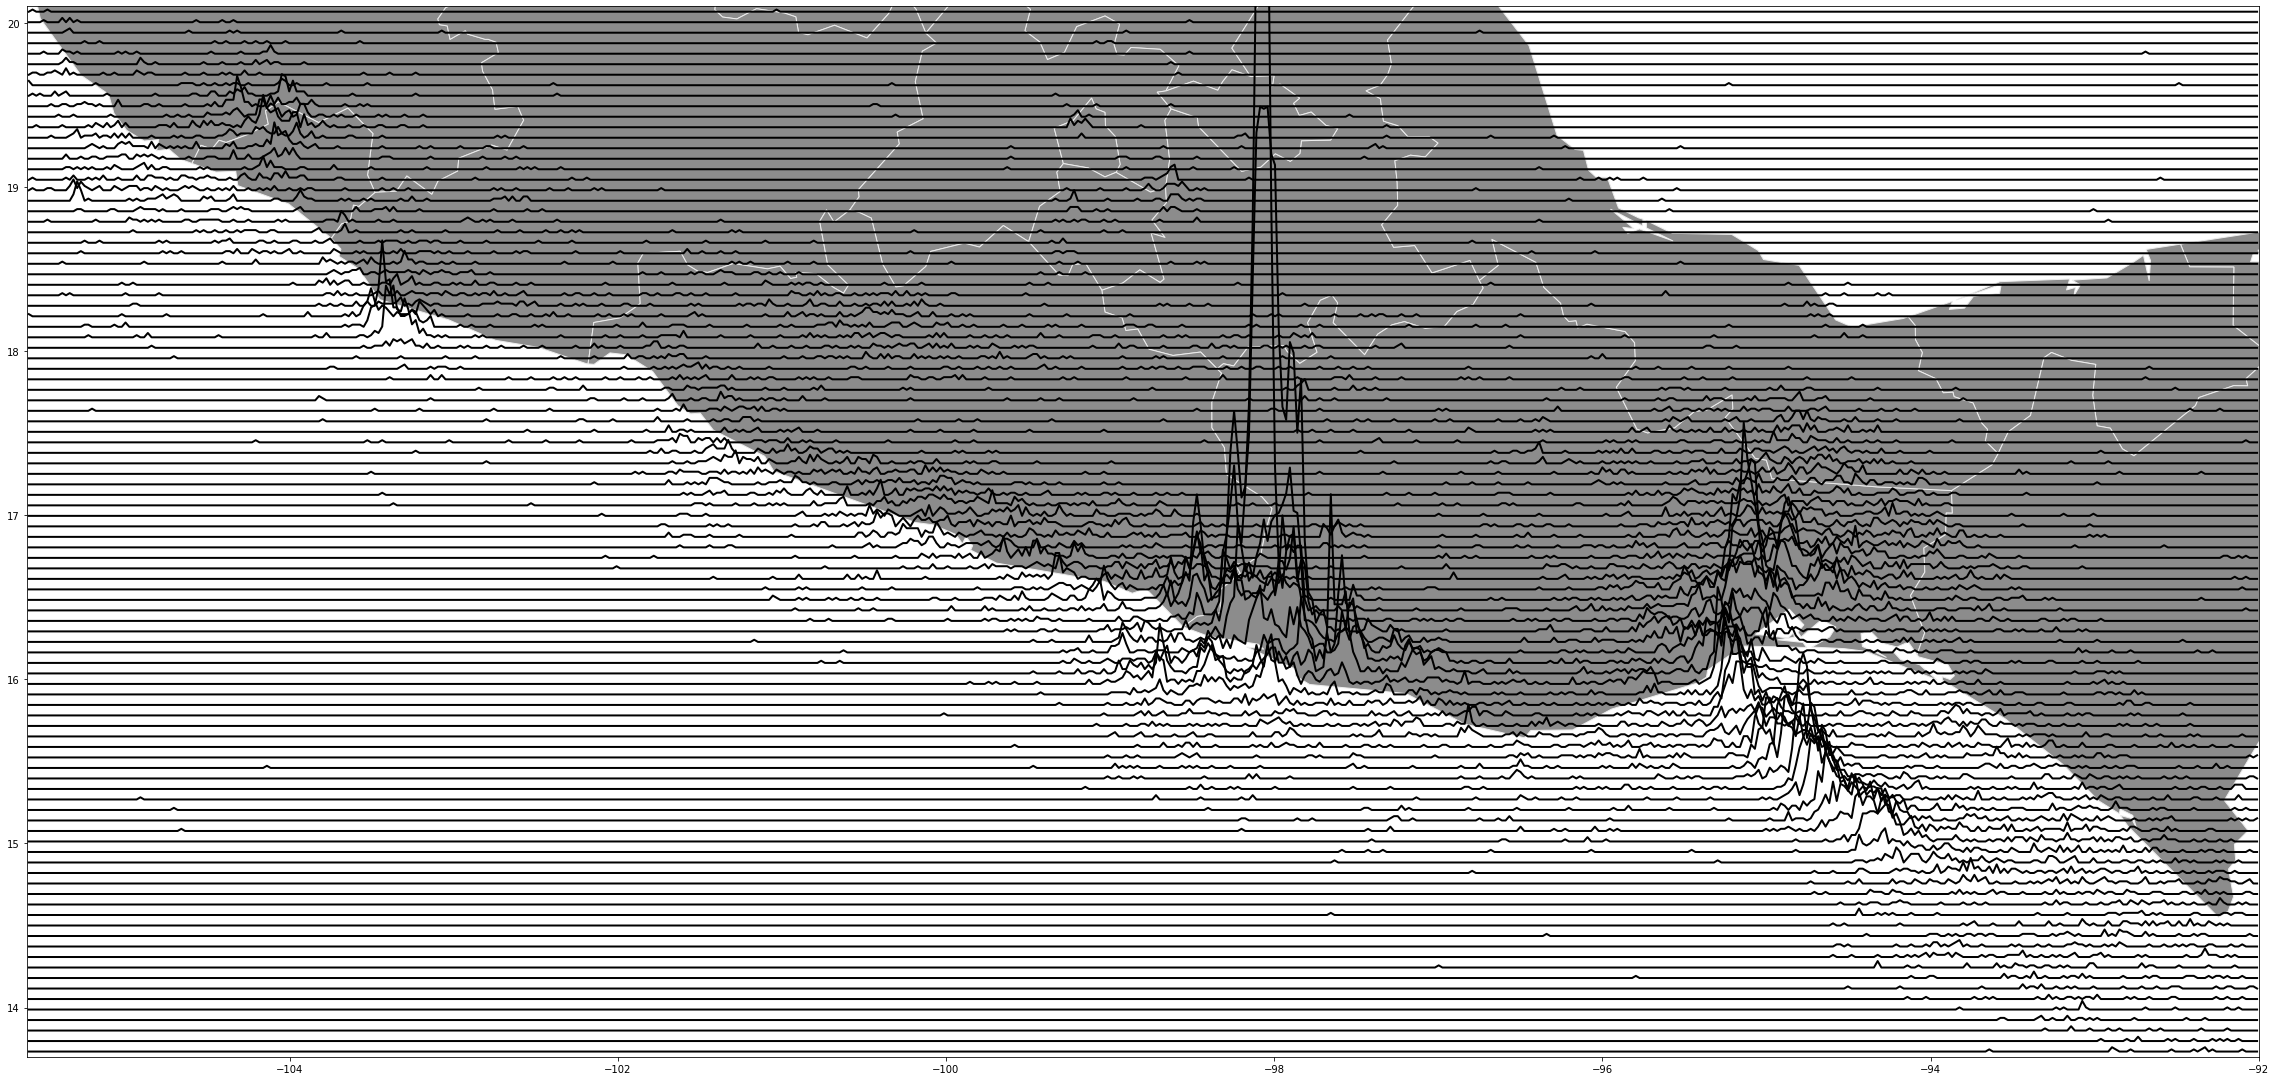

In [164]:
with np.errstate(divide='ignore'):
    normalized = (values / values.max())*5
plt.figure(figsize=(40,20))
ax = plt.gca()
map_df.plot(color='#8C8C8C', edgecolor='#B3B3B3',ax=ax)
for i in range(len(ycenters)):
    plt.plot(xv[:,i], normalized[:,i] + ycenters[i], c="black", linewidth=2)
ax.set_xlim(coordinates_range[0])
ax.set_ylim(coordinates_range[1])

In [144]:
np.log(0.5)

-0.6931471805599453